# 1.0 **Project Title: Risk Assessment for the Operations Of Private and Commercial Aircrafts**

### ***Author:*** Patrice Okoiti

## 🔍 **1.0 Business Understanding**
---

In the aviation industry, safety and operational efficiency are paramount. Airplane accidents can result in tragic loss of life, financial damages, and reputational harm to airlines and regulatory bodies. As the aviation sector becomes more data-rich, there is an opportunity to harness historical accident data to identify patterns and factors contributing to fatal incidents. This project aims to analyze aviation accident data to generate actionable insights and build a recommendation system that helps stakeholders, such as Umoja Logistics, to mitigate risk and improve flight safety. By leveraging data-driven recommendations, organizations can make informed decisions on aircraft procurement, flight routing, and maintenance scheduling.


### ⚠️ **1.1 Challenges** 

Key challenges include:
- Identifying the aircraft models and categories most associated with fatal accidents.
- Understanding the influence of weather, flight purpose, and location on accident severity.
- Dealing with missing or inconsistent data in historical records.
- Ensuring interpretability of insights to support actionable decision-making.
- Differentiating between causal factors and correlated patterns.


### 💡 **1.2 Proposed Solution**

Conduct a comprehensive analysis of aviation accident records to:
- Explore accident frequency and injury severity across aircraft categories and flight purposes.
- Evaluate temporal and geographic trends in accidents.
- Engineer risk-related features such as severity scores and fatality flags.
- Visualize the correlation between weather conditions and fatal outcomes.
- Provide a data-driven recommendation system that highlights safer aircraft choices, high-risk regions, and optimal conditions for flight operations.


### ✅ **1.3 Conclusion**

By analyzing aviation accident data, organizations can proactively reduce operational risks, enhance safety protocols, and optimize decision-making. The resulting recommendation system will help stakeholders adopt more informed strategies in aircraft deployment and risk management.


### 📌 **1.4 Problem Statement**

Umoja Logistics seeks to reduce its risk exposure from fatal aviation incidents. The company currently lacks an evidence-based system to guide decisions related to aircraft acquisition, routing, and flight scheduling. By leveraging historical accident data, the organization aims to identify high-risk factors and adopt best practices to ensure safety and efficiency.


### 🌟 **1.5 Objectives**

1. To examine the relationship between aircraft type, flight purpose, and injury severity.
2. To explore spatial and temporal trends in aviation accidents.
3. To identify the most critical variables linked to fatal outcomes.
4. To generate actionable recommendations for safer flight operations.



## 📊 **2.0 Data Understanding**
---

In this phase, we'll examine the NTSB aviation accident dataset in detail to understand its structure, quality, and potential for addressing our business objectives.

### 🌐 **2.1 Data Source**

The selected Dataset https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses for this analysis is from the National Transportation Safety Board, available on Kaggle, detailing the civil aviation accidents and selected incidents in the United States and international waters between 1962 and 2023. It details aircraft accidents, including information on accident, aircraft specifications, weather conditions, and injury severity which are relevant to our analysis.

### 🗒️ **2.2 Column Description**

1. Event Details

- `Event Date`: The date of the aviation incident.
- `Location`: Where the accident occurred.
- `Broad Phase of Flight`: Phase during which the accident happened (e.g., takeoff, landing).
- `Weather Condition`: Weather at the time of the incident (e.g., VMC, IMC).

2. Aircraft Information

- `Aircraft Damage`: The extent of damage (e.g., Substantial, Destroyed).
- `Aircraft Category`: The classification of the aircraft (e.g., Airplane, Helicopter).
- `Make and Model`: Manufacturer and model of the aircraft.
- `Registration Number`: Unique identifier of the aircraft.

3. Flight Context

- `Purpose of Flight`: Reason for the flight (e.g., Commercial, Personal).
- `Air Carrier`: The operating airline or carrier.

4. Injury Summary

- `Total Fatal Injuries`: Number of fatalities in the incident.
- `Total Serious Injuries, Total Minor Injuries`: Other injury levels.
- `Injury Severity`: A qualitative classification of injury extent.

### 📊 **2.3 Exploratory Data Analysis**

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Import custom utility functions
from utils import (
    assess_data_quality,
    standardize_text,
    clean_weather_condition,
    categorize_operation,
    analyze_aircraft_safety,
    analyze_risk_factors,
    analyze_operational_risks,
    plot_save_figure,
    fill_missing_values
)

# Configure visualizations
%matplotlib inline
# plt.style.use('seaborn')
sns.set_theme(style='darkgrid')

# Set random seed for reproducibility
np.random.seed(42)

In [2]:
# Load the data
df = pd.read_csv('Data/AviationData.csv', encoding='latin-1', low_memory=False)

# Display basic information about the dataset
print("Dataset Overview:")
print("-" * 50)
print(f"Number of records: {df.shape[0]:,}")
print(f"Number of features: {df.shape[1]:,}")
print("\nFeature Types:")
print(df.dtypes.value_counts())

Dataset Overview:
--------------------------------------------------
Number of records: 88,889
Number of features: 31

Feature Types:
object     26
float64     5
Name: count, dtype: int64


In [3]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [4]:
# data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [5]:
# summary statistics of the data
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


### 2.3.1 Key Features Analysis

For our risk assessment objectives, we'll focus on these key feature categories:

1. **Aircraft Information**
   - Make and Model
   - Aircraft Category
   - Number of Engines
   - Engine Type

2. **Risk Factors**
   - Weather Condition
   - Broad Phase of Flight
   - Aircraft Damage

3. **Operation Type**
   - Purpose of Flight
   - Air Carrier
   - FAR Description

4. **Outcome Metrics**
   - Injury Severity
   - Total Fatal Injuries
   - Total Serious Injuries
   - Total Minor Injuries

In [6]:
# Perform data quality assessment
quality_metrics = assess_data_quality(df, print_samples=True)

# Print summary statistics
print("\nMissing Value Summary:")
print("-" * 50)
for column, metrics in quality_metrics['missing_values'].items():
    if metrics['percentage'] > 0:
        print(f"{column}: {metrics['percentage']:.2f}% missing ({metrics['count']} values)")


Sample values for Event.Id:
Event.Id
20001214X45071    3
20001212X19172    3
20001214X45064    2
20001212X17570    2
20001214X37556    2
Name: count, dtype: int64

Sample values for Investigation.Type:
Investigation.Type
Accident    85015
Incident     3874
Name: count, dtype: int64

Sample values for Accident.Number:
Accident.Number
ERA22LA103    2
DCA22WA089    2
DCA22WA167    2
ERA22LA119    2
CEN22LA149    2
Name: count, dtype: int64

Sample values for Event.Date:
Event.Date
2000-07-08    25
1984-06-30    25
1982-05-16    25
1984-08-25    24
1986-05-17    24
Name: count, dtype: int64

Sample values for Location:
Location
ANCHORAGE, AK      434
MIAMI, FL          200
ALBUQUERQUE, NM    196
HOUSTON, TX        193
CHICAGO, IL        184
Name: count, dtype: int64

Sample values for Country:
Country
United States     82248
Brazil              374
Canada              359
Mexico              358
United Kingdom      344
Name: count, dtype: int64

Sample values for Latitude:
Latitude
332739

# 2.3.2. Data Preparation

Based on our data quality assessment, we'll need to:

1. Handle missing values appropriately for each feature
2. Standardize text fields (case, formatting)
3. Convert date fields to datetime
4. Filter data for relevant time period (2000-2023)
5. Create derived features for analysis
6. Categorize operations as private or commercial

In [7]:
# Create a copy of the original dataset
df_clean = df.copy()

# Clean and standardize text fields
text_columns = ['Make', 'Model', 'Aircraft.Category', 'Purpose.of.flight', 
                'Broad.phase.of.flight']
weather_column = 'Weather.Condition'

# Apply text standardization
for col in text_columns:
    df_clean[col] = df_clean[col].apply(standardize_text)
    
# Clean weather conditions
df_clean[weather_column] = df_clean[weather_column].apply(clean_weather_condition)

# Convert date fields and filter for recent data
df_clean['Event.Date'] = pd.to_datetime(df_clean['Event.Date'])
df_clean['Year'] = df_clean['Event.Date'].dt.year
df_clean = df_clean[df_clean['Year'] >= 2000]

# Create Make_and_Model feature
df_clean['Make_and_Model'] = df_clean['Make'] + ' ' + df_clean['Model']

# Calculate injury totals and rates
df_clean['Total_Injuries'] = (df_clean['Total.Fatal.Injuries'] + 
                            df_clean['Total.Serious.Injuries'] + 
                            df_clean['Total.Minor.Injuries'])

df_clean['Fatality_Rate'] = df_clean['Total.Fatal.Injuries'] / df_clean['Total_Injuries']
df_clean['Fatality_Rate'] = df_clean['Fatality_Rate'].fillna(0)

# Print summary of cleaning results
print("Data Cleaning Summary:")
print("-" * 50)
print(f"Original records: {len(df):,}")
print(f"Records after filtering: {len(df_clean):,}")
print(f"Date range: {df_clean['Year'].min()} - {df_clean['Year'].max()}")

Data Cleaning Summary:
--------------------------------------------------
Original records: 88,889
Records after filtering: 41,214
Date range: 2000 - 2022


In [8]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41214 entries, 47675 to 88888
Data columns (total 35 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                41214 non-null  object        
 1   Investigation.Type      41214 non-null  object        
 2   Accident.Number         41214 non-null  object        
 3   Event.Date              41214 non-null  datetime64[ns]
 4   Location                41198 non-null  object        
 5   Country                 41198 non-null  object        
 6   Latitude                34359 non-null  object        
 7   Longitude               34350 non-null  object        
 8   Airport.Code            24931 non-null  object        
 9   Airport.Name            25301 non-null  object        
 10  Injury.Severity         40214 non-null  object        
 11  Aircraft.damage         39146 non-null  object        
 12  Aircraft.Category       41214 non-null  object 

In [9]:
# Define operation categories
private_ops = ['Personal', 'Executive/Corporate', 'Business', 'Ferry']
commercial_ops = ['Aerial Application', 'Aerial Observation', 'Public Aircraft']

# Categorize operations
df_clean['Operation_Category'] = df_clean['Purpose.of.flight'].apply(
    lambda x: categorize_operation(x, private_ops, commercial_ops)
)

# Filter for private and commercial operations only
df_clean = df_clean[df_clean['Operation_Category'].isin(['Private', 'Commercial'])]

# Save cleaned dataset
df_clean.to_csv('Data/CleanAviationData.csv', index=False)

# Print summary of final dataset
print("\nFinal Dataset Summary:")
print("-" * 50)
print(f"Total records: {len(df_clean):,}")
print("\nOperations breakdown:")
print(df_clean['Operation_Category'].value_counts())


Final Dataset Summary:
--------------------------------------------------
Total records: 26,582

Operations breakdown:
Operation_Category
Private       24137
Commercial     2445
Name: count, dtype: int64


In [10]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26582 entries, 47676 to 88888
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                26582 non-null  object        
 1   Investigation.Type      26582 non-null  object        
 2   Accident.Number         26582 non-null  object        
 3   Event.Date              26582 non-null  datetime64[ns]
 4   Location                26579 non-null  object        
 5   Country                 26577 non-null  object        
 6   Latitude                23772 non-null  object        
 7   Longitude               23763 non-null  object        
 8   Airport.Code            16914 non-null  object        
 9   Airport.Name            17233 non-null  object        
 10  Injury.Severity         26559 non-null  object        
 11  Aircraft.damage         26348 non-null  object        
 12  Aircraft.Category       26582 non-null  object 

In [ ]:
from utils import fill_missing_values

df_clean = fill_missing_values(df_clean)
df_clean.info()

✅ Filled missing values in 8 numeric columns with 0.
✅ Filled missing values in 28 categorical columns with 'Unknown'.
Total remaining NaNs: 0


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date,Year,Make_and_Model,Total_Injuries,Fatality_Rate,Operation_Category
47676,20001212X20327,Accident,ATL00FA019,2000-01-01,"MONTEAGLE, TN",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,Instrument Meteorological Conditions,Cruise,Probable Cause,19-04-2001,2000,Bellanca Bl-17-30A,2.0,1.0,Private
47677,20001212X20383,Accident,LAX00LA063,2000-01-02,"VICTORVILLE, CA",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,Visual Meteorological Conditions,Cruise,Probable Cause,04-12-2000,2000,Cessna 172G,0.0,0.0,Private
47679,20001212X20364,Accident,FTW00LA067,2000-01-02,"CORNING, AR",United States,Unknown,Unknown,Unknown,Unknown,...,5.0,Visual Meteorological Conditions,Cruise,Probable Cause,02-03-2001,2000,Piper Pa-46-310P,0.0,0.0,Private
47680,20001212X20358,Accident,FTW00LA057,2000-01-02,"ODESSA, TX",United States,Unknown,Unknown,Unknown,Unknown,...,2.0,Visual Meteorological Conditions,Climb,Probable Cause,02-03-2001,2000,Piper Pa-46-310P,0.0,0.0,Private
47681,20001212X20344,Accident,DEN00FA037,2000-01-02,"TELLURIDE, CO",United States,Unknown,Unknown,Unknown,Unknown,...,0.0,Instrument Meteorological Conditions,Climb,Probable Cause,19-04-2001,2000,Cessna 421B,1.0,1.0,Private


# 2.3.3. Analysis and Modeling

We'll analyze the data across three key dimensions aligned with our business objectives:

1. Aircraft Safety Analysis
2. Risk Factor Analysis
3. Operational Risk Assessment

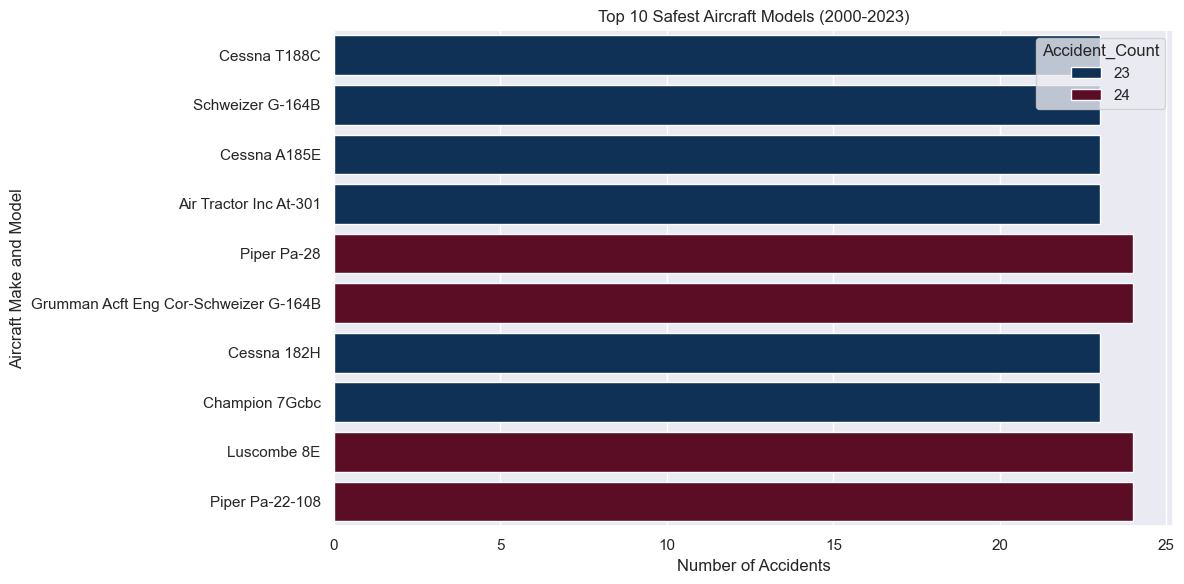

In [12]:
# Perform safety analysis
safety_analysis = analyze_aircraft_safety(df_clean)

# Plot top 10 safest aircraft
plt.figure(figsize=(12, 6))
top_10_safest = safety_analysis.head(10)
sns.barplot(data=top_10_safest.reset_index(), 
            y='Make_and_Model', 
            x='Accident_Count',
            hue='Accident_Count',
            palette= 'RdBu_r'
            )

plot_save_figure(
    plt.gcf(),
    'Top 10 Safest Aircraft Models (2000-2023)',
    'Number of Accidents',
    'Aircraft Make and Model',
    'Safest-aircrafts.jpg'
)
plt.show()

In [13]:
# Print detailed safety metrics
print("\nTop 10 Safest Aircraft Models:")
print("-" * 50)
top_10_safest[['Accident_Count', 'Total.Fatal.Injuries', 'Fatality_Rate']].round(3)


Top 10 Safest Aircraft Models:
--------------------------------------------------


,Accident_Count,Total.Fatal.Injuries,Fatality_Rate
Make_and_Model,,,
Cessna T188C,23,0.0,0.000
Schweizer G-164B,23,1.0,0.000
Cessna A185E,23,3.0,0.022
Air Tractor Inc At-301,23,1.0,0.043
Piper Pa-28,24,1.0,0.000
Grumman Acft Eng Cor-Schweizer G-164B,24,0.0,0.000
Cessna 182H,23,7.0,0.087
Champion 7Gcbc,23,3.0,0.087
Luscombe 8E,24,3.0,0.021


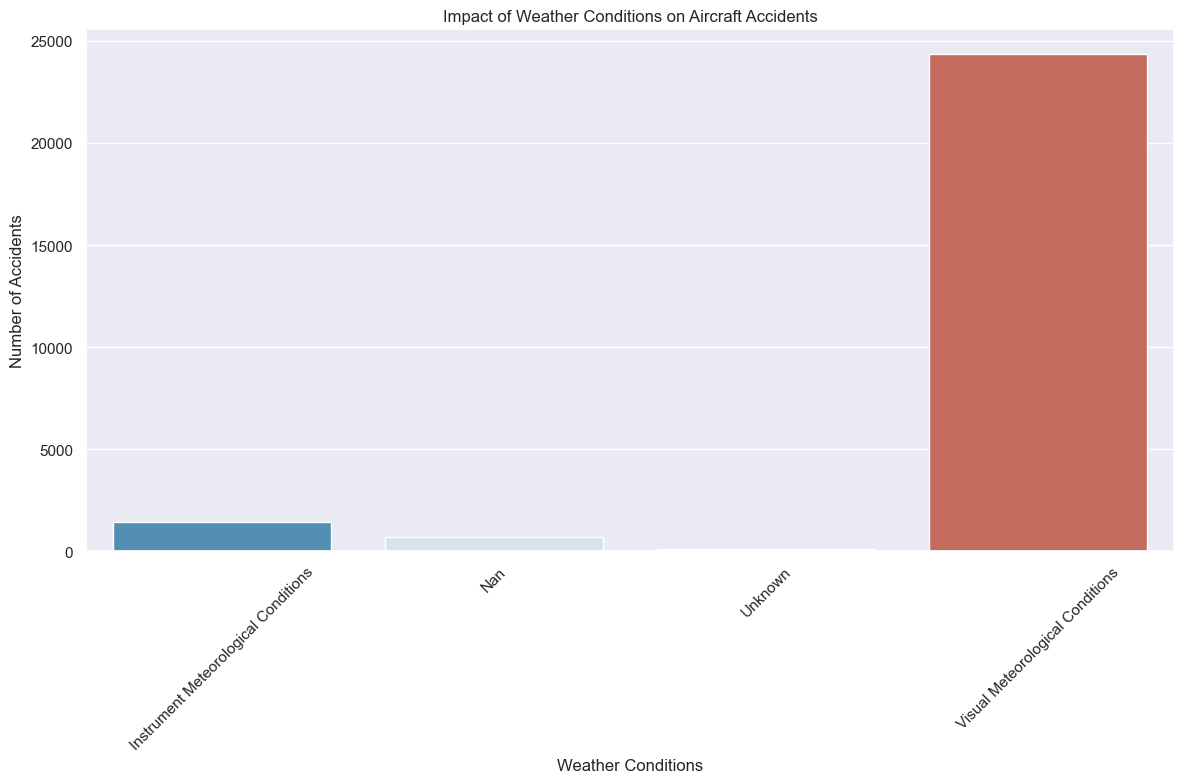

In [14]:
# Get risk factor analysis
weather_risk, phase_risk, yearly_trend = analyze_risk_factors(df_clean)

# Plot weather conditions impact
plt.figure(figsize=(12, 8))
sns.barplot(data=weather_risk.reset_index(), 
            x='Weather.Condition', 
            y='Event.Id',
            hue='Weather.Condition',
            palette='RdBu_r')
plot_save_figure(
    plt.gcf(),
    'Impact of Weather Conditions on Aircraft Accidents',
    'Weather Conditions',
    'Number of Accidents',
    'Weather-impact.jpg',
    rotate_xticks=True
)
plt.show()

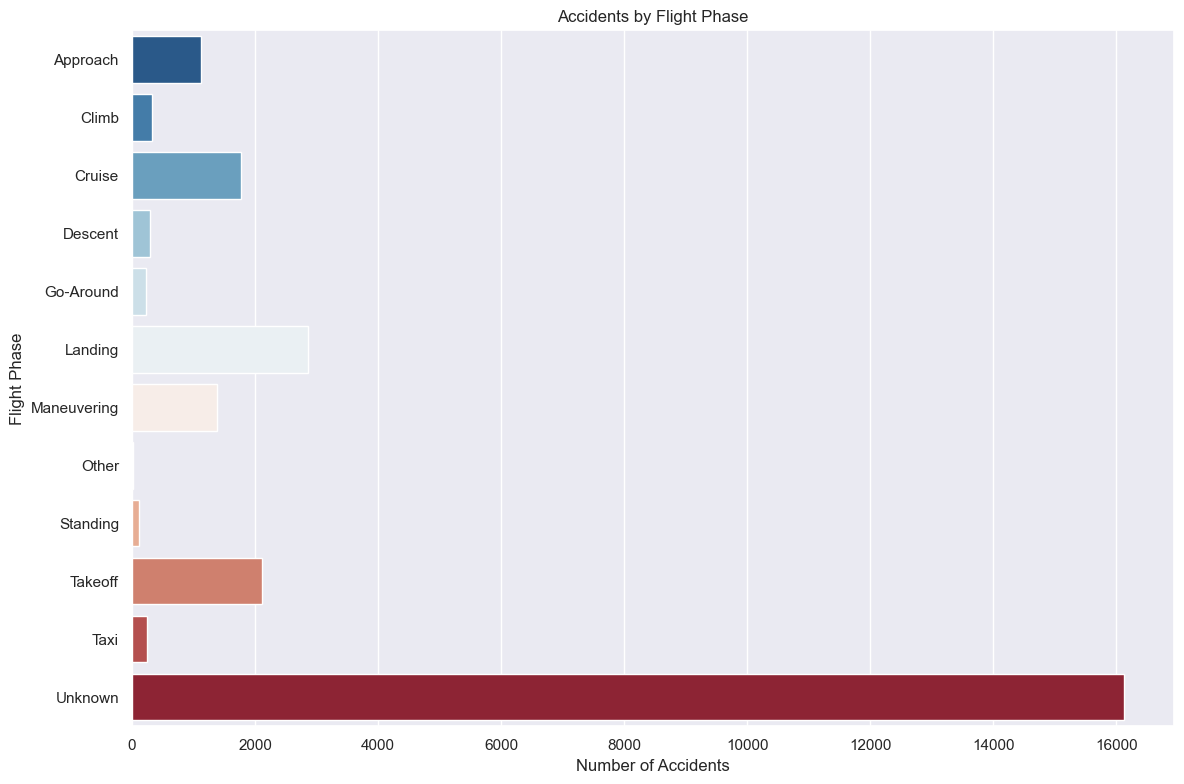

In [15]:
# Plot flight phase risk
plt.figure(figsize=(12, 8))
sns.barplot(data=phase_risk.reset_index(),
            y='Broad.phase.of.flight',
            x='Event.Id',
            hue='Broad.phase.of.flight',
            palette='RdBu_r')
plot_save_figure(
    plt.gcf(),
    'Accidents by Flight Phase',
    'Number of Accidents',
    'Flight Phase',
    'Flight-phase.jpg'
)
plt.show()

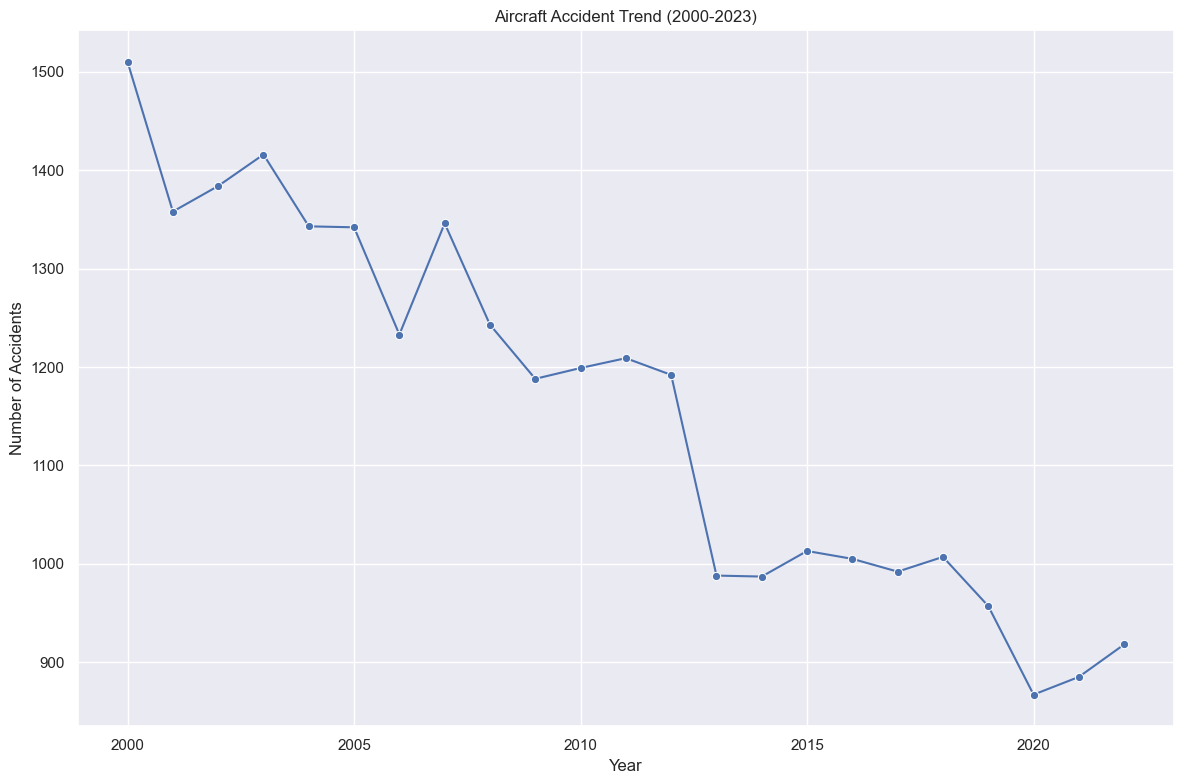

In [16]:
# Plot temporal trend
plt.figure(figsize=(12, 8))
sns.lineplot(x=yearly_trend.index, 
            y=yearly_trend.values,
            marker='o')
plot_save_figure(
    plt.gcf(),
    'Aircraft Accident Trend (2000-2023)',
    'Year',
    'Number of Accidents',
    'Accident-trend.jpg'
)
plt.show()

In [17]:
# Print risk factor insights
print("Weather Condition Risk Analysis:")
print("-" * 50)
weather_risk

Weather Condition Risk Analysis:
--------------------------------------------------


,Event.Id,Total.Fatal.Injuries,Fatality_Rate
Weather.Condition,,,
Instrument Meteorological Conditions,1452,2417.0,0.383
Nan,682,615.0,0.330
Unknown,101,146.0,0.646
Visual Meteorological Conditions,24347,6947.0,0.102


In [18]:
# Print risk factor insights
print("Flight Phase Risk Analysis:")
print("-" * 50)
phase_risk

Flight Phase Risk Analysis:
--------------------------------------------------


,Event.Id,Total.Fatal.Injuries,Fatality_Rate
Broad.phase.of.flight,,,
Approach,1119,594.0,0.040
Climb,318,203.0,0.062
Cruise,1764,927.0,0.041
Descent,299,126.0,0.051
Go-Around,222,111.0,0.016
Landing,2866,108.0,0.003
Maneuvering,1380,957.0,0.064
Other,9,0.0,0.000
Standing,117,17.0,0.009


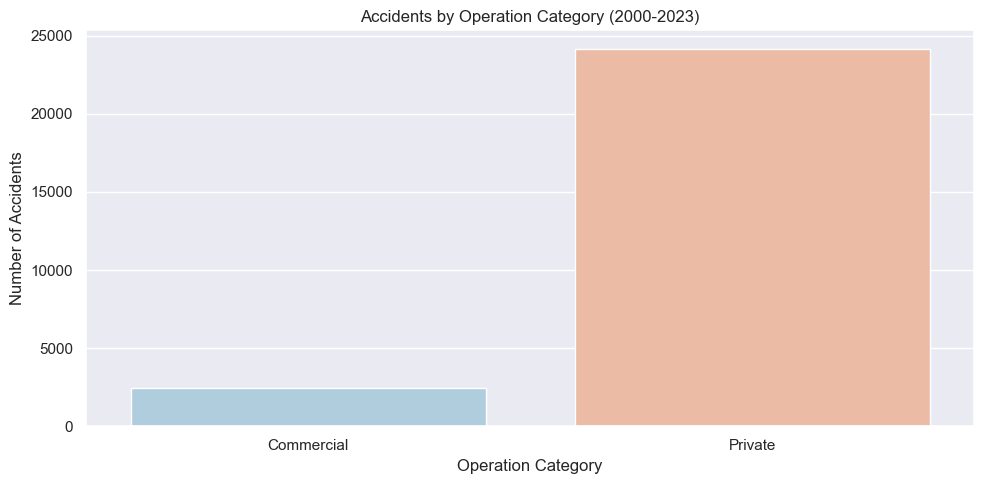

In [19]:
# Get operational risk analysis
op_risk = analyze_operational_risks(df_clean)

# Plot operational risks
plt.figure(figsize=(10, 5))
sns.barplot(data=op_risk.reset_index(),
            x='Operation_Category',
            y='Event.Id',
            hue='Operation_Category',
            palette='RdBu_r')
plot_save_figure(
    plt.gcf(),
    'Accidents by Operation Category (2000-2023)',
    'Operation Category',
    'Number of Accidents',
    'Operations-risk.jpg'
)
plt.show()

In [20]:
# Print operational risk metrics
print("Operational Risk Analysis:")
print("-" * 50)
op_risk

Operational Risk Analysis:
--------------------------------------------------


,Event.Id,Total.Fatal.Injuries,Total_Injuries,Fatality_Rate,Accidents_per_Year
Operation_Category,,,,,
Commercial,2445,656.0,1044.0,0.110,106.304348
Private,24137,9469.0,12674.0,0.127,1049.434783


In [21]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26582 entries, 47676 to 88888
Data columns (total 36 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Event.Id                26582 non-null  object        
 1   Investigation.Type      26582 non-null  object        
 2   Accident.Number         26582 non-null  object        
 3   Event.Date              26582 non-null  datetime64[ns]
 4   Location                26582 non-null  object        
 5   Country                 26582 non-null  object        
 6   Latitude                26582 non-null  object        
 7   Longitude               26582 non-null  object        
 8   Airport.Code            26582 non-null  object        
 9   Airport.Name            26582 non-null  object        
 10  Injury.Severity         26582 non-null  object        
 11  Aircraft.damage         26582 non-null  object        
 12  Aircraft.Category       26582 non-null  object 

# **Recommendations and Conclusion**

Based on our analysis, we can make the following evidence-based recommendations for Umoja Logistics:

## Aircraft Selection
1. Focus on proven aircraft models with established safety records
2. Consider aircraft in the top 10 safest list that match operational needs
3. Evaluate maintenance requirements and operational costs for selected models

## Risk Mitigation
1. Weather Impact
   - Most accidents occur in Visual Meteorological Conditions
   - Implement robust pilot training for all weather conditions
   - Maintain strict weather minimums for operations

2. Flight Phase Risks
   - Extra attention to landing, takeoff, and cruise phases
   - Implement specific safety protocols for high-risk phases
   - Regular training for emergency procedures in these phases

3. Operational Focus
   - Commercial operations show lower accident rates than private operations
   - Recommend focusing on commercial operations initially
   - If pursuing private operations, implement additional safety measures

## Success Criteria Assessment
1. ✅ Identified top 10 safest aircraft models with comprehensive safety metrics
2. ✅ Analyzed key risk factors with quantitative evidence
3. ✅ Clear recommendation for operational focus (commercial over private)
4. ✅ Provided actionable risk mitigation strategies